In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
insurance_df=pd.read_csv('insurance-part2-data-2.xls')

In [3]:
insurance_df.head()


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
insurance_df.shape

(3000, 10)

In [5]:
insurance_df.describe(include="all")

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [6]:
insurance_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [7]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [8]:
dups = insurance_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
dups


Number of duplicate rows = 139


0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [9]:
insurance_df.drop_duplicates(inplace=True)
dups = insurance_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(insurance_df.shape)

Number of duplicate rows = 0
(2861, 10)


<AxesSubplot:>

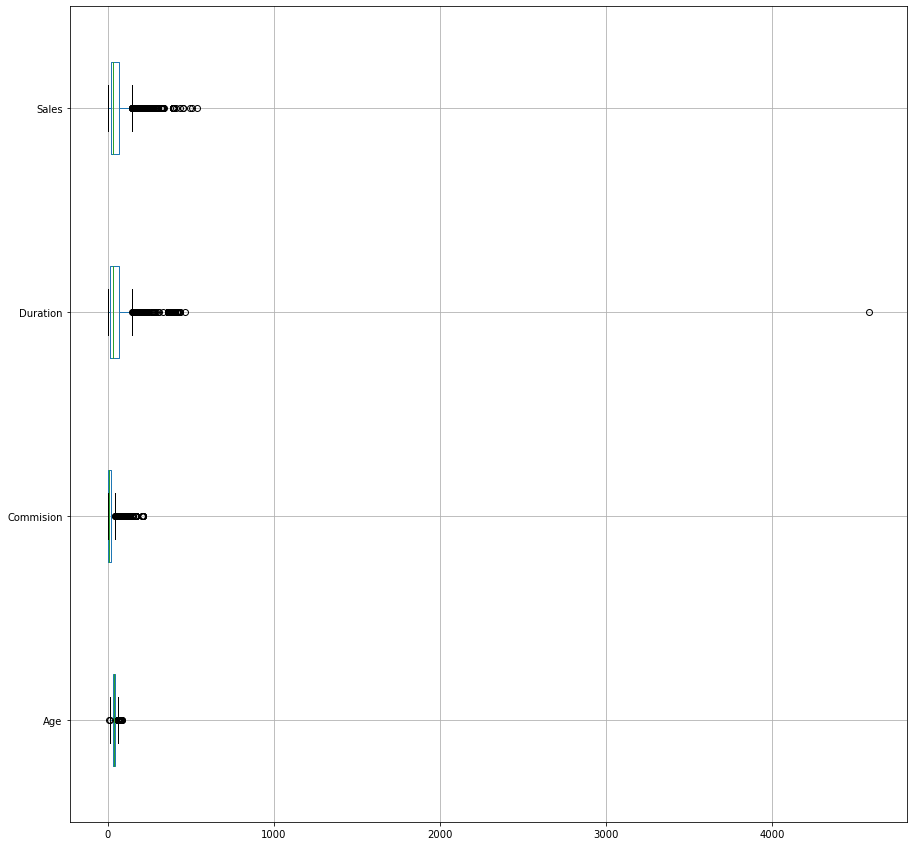

In [10]:
plt.figure(figsize=(15,15))
insurance_df[["Age","Commision","Duration","Sales"]].boxplot(vert=0)

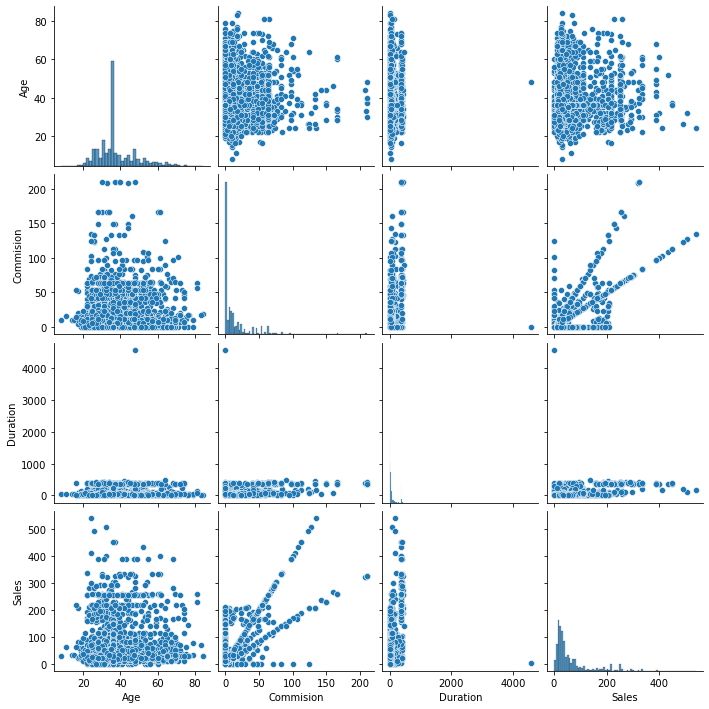

In [11]:
sns.pairplot(data=insurance_df)

<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

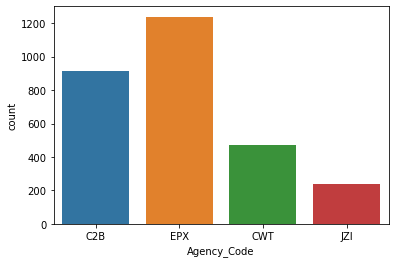

In [12]:
sns.countplot(data =insurance_df, x = 'Agency_Code')

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

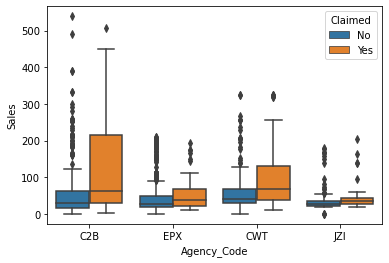

In [13]:
sns.boxplot(data = insurance_df, x='Agency_Code',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Type', ylabel='count'>

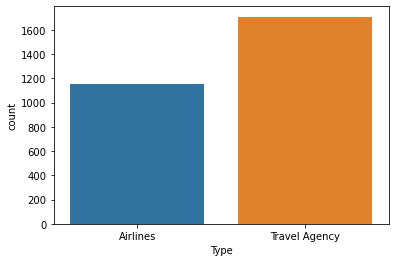

In [14]:
sns.countplot(data =insurance_df, x= 'Type')


<AxesSubplot:xlabel='Type', ylabel='Sales'>

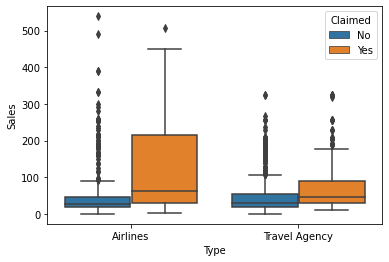

In [15]:
sns.boxplot(data =insurance_df, x='Type',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Channel', ylabel='count'>

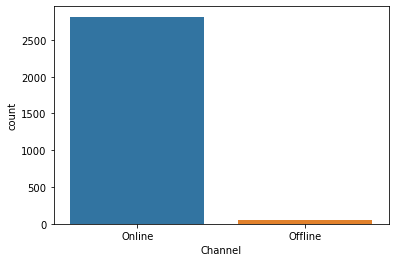

In [16]:
sns.countplot(data =insurance_df, x = 'Channel')


<AxesSubplot:xlabel='Channel', ylabel='Sales'>

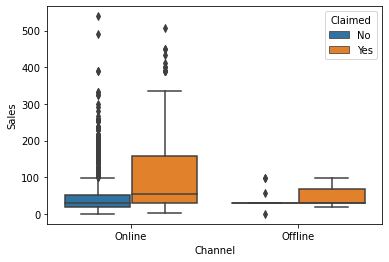

In [17]:
sns.boxplot(data =insurance_df, x='Channel',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Product Name', ylabel='count'>

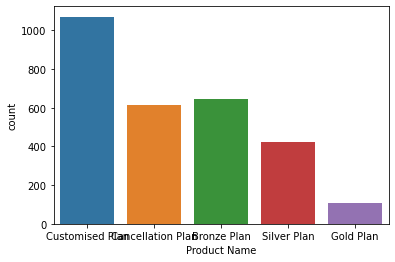

In [18]:
sns.countplot(data = insurance_df, x = 'Product Name')

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

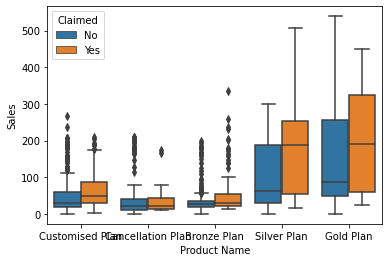

In [19]:
sns.boxplot(data = insurance_df, x='Product Name',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Destination', ylabel='count'>

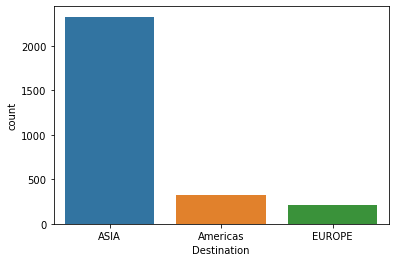

In [20]:
sns.countplot(data = insurance_df, x = 'Destination')


<AxesSubplot:xlabel='Destination', ylabel='Sales'>

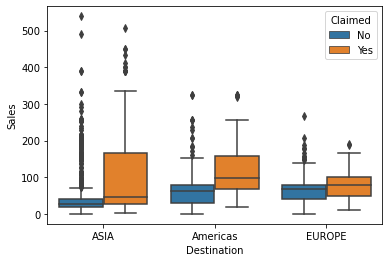

In [21]:
sns.boxplot(data = insurance_df, x='Destination',y='Sales', hue='Claimed')

<AxesSubplot:>

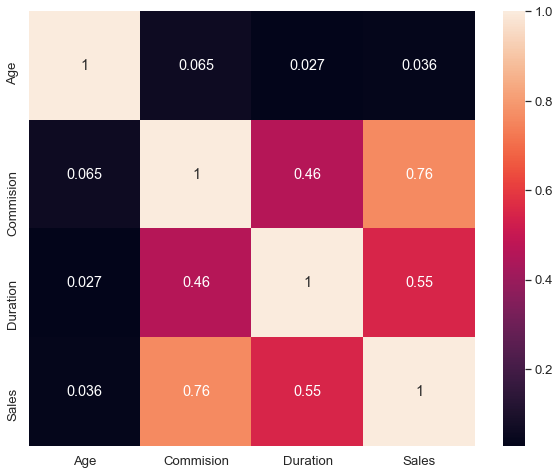

In [22]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(insurance_df[["Age","Commision","Duration","Sales"]].corr(), annot=True)

In [23]:
for feature in insurance_df.columns:
 if insurance_df[feature].dtype == 'object':
    print('\n')
    print('feature:',feature)
    print(pd.Categorical(insurance_df[feature].unique()))
    print(pd.Categorical(insurance_df[feature].unique()).codes)
    insurance_df[feature] = pd.Categorical(insurance_df[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [24]:
insurance_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 193.1 KB


In [25]:
insurance_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [26]:
insurance_df.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

In [27]:
x=insurance_df.drop("Claimed",axis=1)
y=insurance_df.pop("Claimed")
x.head()


,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, train_labels, test_labels = train_test_split(x, y, test_size=.30, random_state=1, stratify = y)

In [29]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

x_train (2002, 9)
x_test (859, 9)
train_labels (2002,)
test_labels (859,)


In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
insurance_model=DecisionTreeClassifier(criterion='gini')

In [32]:
insurance_model.fit(x_train,train_labels)

DecisionTreeClassifier()

In [33]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV


In [34]:
train_char_label = ['No', 'Yes']
claimed_Tree_File = open('d:\claimed_tree.dot','w')
dot_data = tree.export_graphviz(insurance_model, out_file=claimed_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))

claimed_Tree_File.close()

In [35]:
param_grid = {
 'criterion': ['gini'],
 'max_depth': [10,12,14,15],
 'min_samples_leaf': [90,100,110],
 'min_samples_split': [310,300,295],
}
dtcl = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [36]:
grid_search.fit(x_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 90, 'min_samples_split': 300}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=90, min_samples_split=300,
                       random_state=1)

In [37]:
train_char_label = ['no', 'yes']
tree_regularized = open("D:\claimed_tree_file.dot","w")
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(x_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data


In [38]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = x_train.columns))

                   Imp
Age           0.009958
Agency_Code   0.611992
Type          0.000000
Commision     0.020748
Channel       0.000000
Duration      0.002009
Sales         0.303211
Product Name  0.052082
Destination   0.000000


In [39]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [40]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(x_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head(10)

,0,1
0,0.455253,0.544747
1,0.907749,0.092251
2,0.612069,0.387931
3,0.907749,0.092251
4,0.755274,0.244726
5,0.878378,0.121622
6,0.220974,0.779026
7,0.755274,0.244726
8,0.951111,0.048889
9,0.830000,0.170000


AUC: 0.804


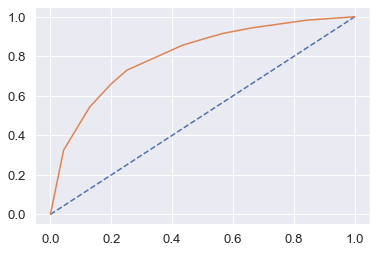

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# predict probabilities
probs = best_grid.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
insurance_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % insurance_train_auc)
# calculate roc curve
insurance_train_fpr, insurance_train_tpr, insurance_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(insurance_train_fpr, insurance_train_tpr)

AUC: 0.813


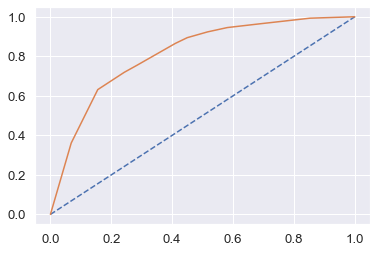

In [42]:
# predict probabilities
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
insurance_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % insurance_test_auc)
# calculate roc curve
insurance_test_fpr, insurance_test_tpr, insurance_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(insurance_test_fpr, insurance_test_tpr)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
confusion_matrix(train_labels, ytrain_predict)

array([[1186,  176],
       [ 292,  348]], dtype=int64)

In [45]:
insurance_train_acc=best_grid.score(x_train,train_labels)
insurance_train_acc

0.7662337662337663

In [46]:
print(classification_report(train_labels, ytrain_predict))


              precision    recall  f1-score   support

           0       0.80      0.87      0.84      1362
           1       0.66      0.54      0.60       640

    accuracy                           0.77      2002
   macro avg       0.73      0.71      0.72      2002
weighted avg       0.76      0.77      0.76      2002



In [47]:
insurance_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(insurance_metrics).transpose()
insurance_train_f1=round(df.loc["1"][2],2)
insurance_train_recall=round(df.loc["1"][1],2)
insurance_train_precision=round(df.loc["1"][0],2)
print ('insurance_train_precision ',insurance_train_precision)
print ('insurance_train_recall ',insurance_train_recall)
print ('insurance_train_f1 ',insurance_train_f1)

insurance_train_precision  0.66
insurance_train_recall  0.54
insurance_train_f1  0.6


In [48]:
confusion_matrix(test_labels, ytest_predict)


array([[494,  91],
       [101, 173]], dtype=int64)

In [49]:
#Test Data Accuracy
insurance_test_acc=best_grid.score(x_test,test_labels)
insurance_test_acc

0.7764842840512224

In [50]:
print(classification_report(test_labels, ytest_predict))


              precision    recall  f1-score   support

           0       0.83      0.84      0.84       585
           1       0.66      0.63      0.64       274

    accuracy                           0.78       859
   macro avg       0.74      0.74      0.74       859
weighted avg       0.77      0.78      0.78       859



In [51]:
insurance_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(insurance_metrics).transpose()
insurance_test_f1=round(df.loc["1"][2],2)
insurance_test_recall=round(df.loc["1"][1],2)
insurance_test_precision=round(df.loc["1"][0],2)
print ('insurance_test_precision ',insurance_test_precision)
print ('insurance_test_recall ',insurance_test_recall)
print ('insurance_test_f1 ',insurance_test_f1)

insurance_test_precision  0.66
insurance_test_recall  0.63
insurance_test_f1  0.64


In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rfcl=RandomForestClassifier( n_estimators=500,
 oob_score=True,
max_depth=10,
max_features=5,
min_samples_leaf=21,
min_samples_split=60)


In [54]:
rfcl.fit(x_train,train_labels)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=21,
                       min_samples_split=60, n_estimators=500, oob_score=True)

In [55]:
rfcl.oob_score_

0.7602397602397603

In [56]:
param_grid={'n_estimators':[301,501],
 'max_depth':[10,20],
 'min_samples_leaf':[21,22],
 'min_samples_split':[60,70],
 'max_features':[5,6],
}

In [57]:
rfcl=RandomForestClassifier()

In [58]:
grid_search=GridSearchCV(estimator=rfcl,param_grid=param_grid,cv=3)


In [59]:
grid_search.fit(x_train,train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20], 'max_features': [5, 6],
                         'min_samples_leaf': [21, 22],
                         'min_samples_split': [60, 70],
                         'n_estimators': [301, 501]})

In [60]:
grid_search.best_params_


{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 21,
 'min_samples_split': 60,
 'n_estimators': 301}

In [61]:
best_grid=grid_search.best_estimator_


In [62]:
best_grid


RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=21,
                       min_samples_split=60, n_estimators=301)

In [63]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [64]:
confusion_matrix(train_labels,ytrain_predict)

array([[1221,  141],
       [ 276,  364]], dtype=int64)

In [65]:
rf_train_acc=best_grid.score(x_train,train_labels)
rf_train_acc

0.7917082917082917

In [66]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85      1362
           1       0.72      0.57      0.64       640

    accuracy                           0.79      2002
   macro avg       0.77      0.73      0.74      2002
weighted avg       0.79      0.79      0.78      2002



In [67]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.72
rf_train_recall  0.57
rf_train_f1  0.64


Area under Curve is 0.8471268125917769


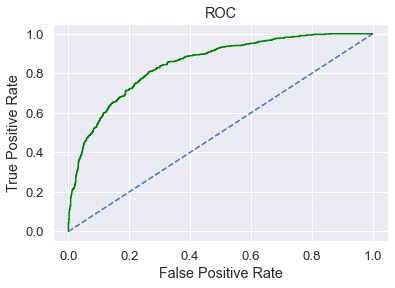

In [68]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(x_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(x_train)[:,1])
print('Area under Curve is', rf_train_auc)


In [69]:
confusion_matrix(test_labels,ytest_predict)

array([[498,  87],
       [107, 167]], dtype=int64)

In [70]:
rf_test_acc=best_grid.score(x_test,test_labels)
rf_test_acc

0.7741559953434226

In [71]:
print(classification_report(test_labels,ytest_predict))


              precision    recall  f1-score   support

           0       0.82      0.85      0.84       585
           1       0.66      0.61      0.63       274

    accuracy                           0.77       859
   macro avg       0.74      0.73      0.73       859
weighted avg       0.77      0.77      0.77       859



In [72]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.66
rf_test_recall  0.61
rf_test_f1  0.63


Area under Curve is 0.8186224967246865


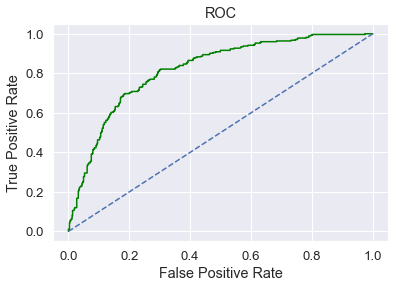

In [73]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(x_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(x_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [74]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = x_train.columns))

                   Imp
Age           0.046628
Agency_Code   0.315043
Type          0.023316
Commision     0.090909
Channel       0.000088
Duration      0.082325
Sales         0.226019
Product Name  0.203907
Destination   0.011764


In [75]:
from sklearn.neural_network import MLPClassifier

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
sc=StandardScaler()


In [78]:
x_train=sc.fit_transform(x_train)

In [79]:
x_train

array([[-1.14675405, -1.29596047, -1.23732512, ..., -0.31212098,
        -1.31429117, -0.45840289],
       [-0.58105345,  0.70597847,  0.80819502, ..., -0.58498273,
         0.25470759, -0.45840289],
       [-0.20391971,  0.70597847,  0.80819502, ..., -0.45573242,
        -0.52979179, -0.45840289],
       ...,
       [ 0.64463119, -1.29596047, -1.23732512, ..., -0.24677777,
         1.82370636, -0.45840289],
       [-0.20391971,  0.70597847,  0.80819502, ..., -0.01053693,
         0.25470759, -0.45840289],
       [-1.24103748, -0.294991  ,  0.80819502, ..., -0.30350429,
         0.25470759,  2.8848488 ]])

In [80]:
x_test=sc.transform(x_test)


In [81]:
x_test


array([[-0.95818718, -1.29596047, -1.23732512, ..., -0.60652444,
         1.82370636, -0.45840289],
       [-0.20391971,  0.70597847,  0.80819502, ..., -0.42701013,
        -0.52979179, -0.45840289],
       [-0.67533688, -0.294991  ,  0.80819502, ...,  0.12302171,
         0.25470759,  1.21322296],
       ...,
       [-0.20391971,  0.70597847,  0.80819502, ..., -0.03925922,
        -0.52979179,  1.21322296],
       [-1.14675405, -1.29596047, -1.23732512, ...,  0.16897738,
        -1.31429117, -0.45840289],
       [-0.29820315, -1.29596047, -1.23732512, ...,  2.75900984,
         1.82370636, -0.45840289]])

In [82]:
param_grid = {
 'hidden_layer_sizes': [520,100,500],
 'max_iter': [2500,3000],
 'solver': ['adam'],
 'tol': [0.01],
}
nncl = MLPClassifier(random_state=1)
grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10) 

In [83]:
grid_search.fit(x_train, train_labels)
grid_search.best_params_


{'hidden_layer_sizes': 500, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [84]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=500, max_iter=2500, random_state=1, tol=0.01)

In [85]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)


In [86]:
confusion_matrix(train_labels,ytrain_predict)


array([[1271,   91],
       [ 387,  253]], dtype=int64)

In [87]:
nn_train_acc=best_grid.score(x_train,train_labels)
nn_train_acc


0.7612387612387612

In [88]:
print(classification_report(train_labels,ytrain_predict))


              precision    recall  f1-score   support

           0       0.77      0.93      0.84      1362
           1       0.74      0.40      0.51       640

    accuracy                           0.76      2002
   macro avg       0.75      0.66      0.68      2002
weighted avg       0.76      0.76      0.74      2002



In [89]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.74
nn_train_recall  0.4
nn_train_f1  0.51


Area under Curve is 0.7923722008076357


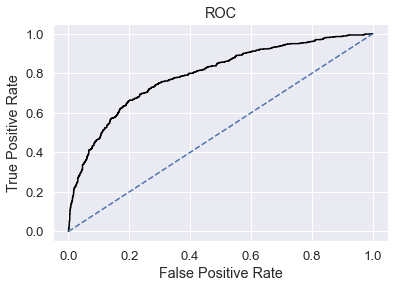

In [90]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(x_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(x_train)[:,1])
print('Area under Curve is', nn_train_auc)

In [91]:
confusion_matrix(test_labels,ytest_predict)


array([[527,  58],
       [155, 119]], dtype=int64)

In [92]:
nn_test_acc=best_grid.score(x_test,test_labels)
nn_test_acc

0.7520372526193247

In [93]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       585
           1       0.67      0.43      0.53       274

    accuracy                           0.75       859
   macro avg       0.72      0.67      0.68       859
weighted avg       0.74      0.75      0.73       859



In [94]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.67
nn_test_recall  0.43
nn_test_f1  0.53


Area under Curve is 0.7938860814773224


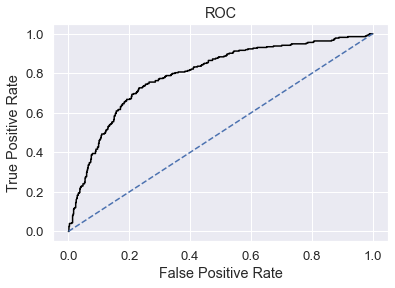

In [95]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(x_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(x_test)[:,1])
print('Area under Curve is', nn_test_auc)


In [96]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=500, max_iter=2500, random_state=1, tol=0.01)>

In [101]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data=pd.DataFrame({'CART Train':[insurance_train_acc,insurance_train_auc,insurance_train_recall,insurance_test_precision,insurance_train_f1],
      'CART Test':[insurance_test_acc,insurance_test_auc,insurance_test_recall,insurance_test_precision,insurance_test_f1],
      'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
      'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
      'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
      'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)



,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.77,0.78,0.79,0.77,0.76,0.75
AUC,0.80,0.81,0.85,0.82,0.79,0.79
Recall,0.54,0.63,0.57,0.61,0.40,0.43
Precision,0.66,0.66,0.72,0.66,0.74,0.67
F1 Score,0.60,0.64,0.64,0.63,0.51,0.53


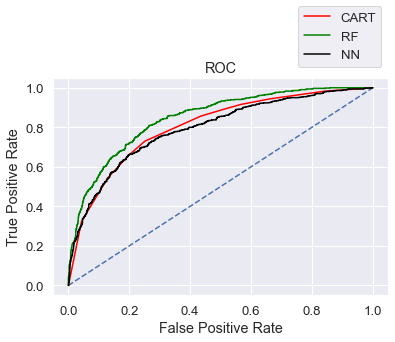

In [99]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(insurance_train_fpr, insurance_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

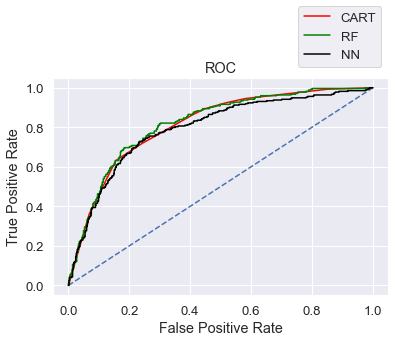

In [100]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(insurance_test_fpr,insurance_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [102]:
data.head()

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.766234,0.776484,0.791708,0.774156,0.761239,0.752037
AUC,0.803702,0.812833,0.847127,0.818622,0.792372,0.793886
Recall,0.540000,0.630000,0.570000,0.610000,0.400000,0.430000
Precision,0.660000,0.660000,0.720000,0.660000,0.740000,0.670000
F1 Score,0.600000,0.640000,0.640000,0.630000,0.510000,0.530000
